In [1]:
import cv2
import time
import numpy as np
import PIL.Image
from io import BytesIO
import IPython.display
import ipywidgets as widgets
import threading


In [2]:
def showarray(a, prev_display_id=None, fmt='jpeg'):
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    obj = IPython.display.Image(data=f.getvalue())
    if prev_display_id is not None:
        IPython.display.update_display(obj, display_id=prev_display_id)
        return prev_display_id
    else:
        return IPython.display.display(obj, display_id=True)

In [3]:

def get_frame(cam):
    '''
    To get Frame in webcam or video
    :param cam: webcam or video
    :return: frame(image)
    '''
    # Capture frame-by-frame
    ret, frame = cam.read()
    
    #flip image for natural viewing
#     frame = cv2.flip(frame, 1)
    
    return frame

In [4]:

def get_camera_indexes(max=10):
    arr = []
    for index in range(0, max):
#         print(index)
        cap = cv2.VideoCapture()
        cap.open(index)
        if cap.isOpened():
            arr.append(index)
        cap.release()
    return arr

In [5]:
camera_indexes = get_camera_indexes()

print(camera_indexes)

[1]


In [6]:
cameras = []

def init_cameras():
    
    for camera_index in camera_indexes:

        cam = cv2.VideoCapture(camera_index)

        cam.set(cv2.CAP_PROP_FRAME_WIDTH, 1024)
        cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 1024)


        cameras.append({
            "camera_index": camera_index,
            'cam': cam,
            'display_id': None,
        })
        
def stop_cameras():      
    for camera in cameras:
        cam = camera.get('cam')
        cam.release()

test


Output()

FloatProgress(value=0.0, max=1.0)

test2


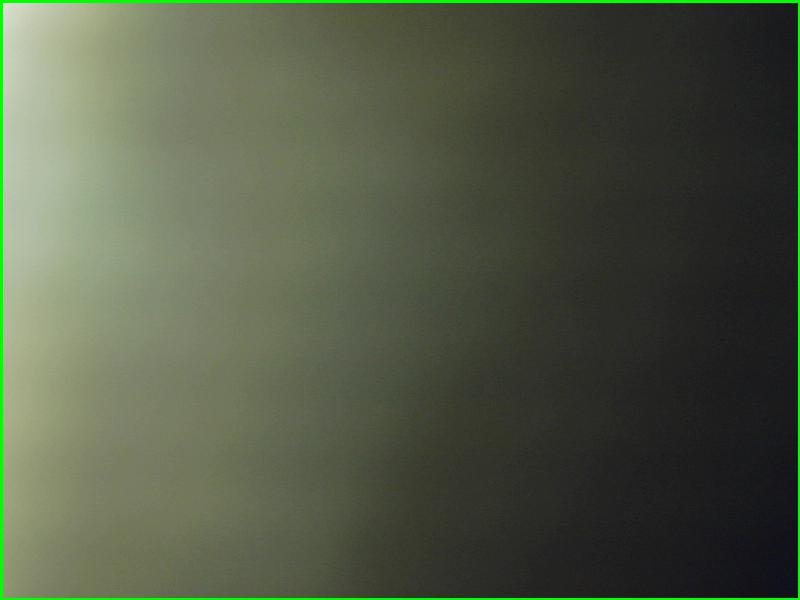

test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test

KeyboardInterrupt: 

In [7]:
from inference.inference import *
weights = './model/yolor/FMDD+COCO+RMFRD(Mask_NoMask)/best_257.pt'
cfg = './Yolor/cfg/yolor_p6.cfg'
cap = cv2.VideoCapture(0)
model = setting_model(cfg, weights)
init_cameras()

total_cameras = len(camera_indexes)

frames_per_camera = 100

capture_image = False

fps_output = widgets.Output()
display(fps_output)

progress = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)

current_frame_number = 0

def work(progress):
    while current_frame_number is not frames_per_camera:
        time.sleep(1)
        progress.value = current_frame_number/frames_per_camera

thread = threading.Thread(target=work, args=(progress,))
display(progress)
thread.start()

while True:  
    t1 = time.time()
        
    for camera_num, camera in enumerate(cameras):
        
        cam = camera.get('cam')

        # Capture frame-by-frame
        frame = get_frame(cam)
        # Convert the image from OpenCV BGR format to matplotlib RGB format
        # to display the image
        output, ori_image, trans_image = inference(frame, model)
        result_img = post_processing(output, ori_image, trans_image)
        result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

        display_id = camera.get('display_id')
#         print(camera)
        if display_id is not None:
            showarray(result_img, display_id)
        else:
            display_handle = showarray(result_img)
            camera['display_id'] = display_handle.display_id
            
        
    t2 = time.time()

    #ref: https://github.com/jupyter-widgets/ipywidgets/issues/1744#issuecomment-335179855
    with fps_output:
#         print("Camera: %d of %d" % (camera_num + 1, total_cameras))
        print("%f FPS" % (1/(t2-t1)))
        # Display the frame info until new frame is available
        IPython.display.clear_output(wait=True)

# stop_cameras()        
    
# with fps_output:
#     print ("Stream stopped")